<a href="https://colab.research.google.com/github/mandimeow/Tareas-owo/blob/main/Codigo_Poyecto_2_parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Train shape: (7007, 2352)
Test shape: (2005, 2352)

🔍 Entrenando SVM...

📈 Reporte SVM:

              precision    recall  f1-score   support

           0       0.45      0.42      0.44        66
           1       0.46      0.55      0.50       103
           2       0.57      0.45      0.50       220
           3       0.40      0.09      0.14        23
           4       0.46      0.30      0.36       223
           5       0.83      0.92      0.87      1341
           6       0.90      0.31      0.46        29

    accuracy                           0.74      2005
   macro avg       0.58      0.43      0.47      2005
weighted avg       0.72      0.74      0.73      2005



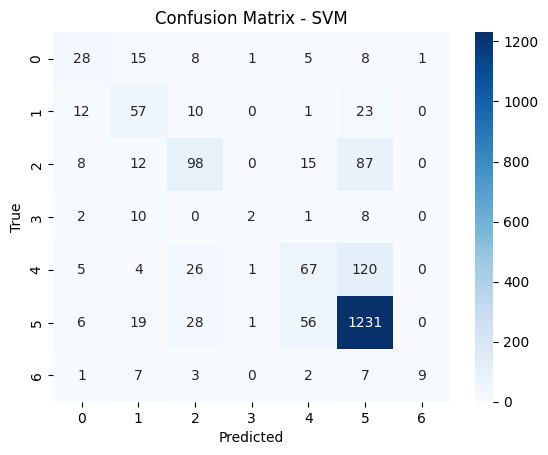


🔍 Entrenando KNN...

📈 Reporte KNN:

              precision    recall  f1-score   support

           0       0.34      0.24      0.28        66
           1       0.37      0.39      0.38       103
           2       0.41      0.41      0.41       220
           3       0.13      0.09      0.11        23
           4       0.40      0.13      0.20       223
           5       0.79      0.91      0.85      1341
           6       0.25      0.03      0.06        29

    accuracy                           0.70      2005
   macro avg       0.38      0.31      0.33      2005
weighted avg       0.65      0.70      0.66      2005


🔍 Entrenando Árbol de Decisión...

📈 Reporte Árbol de Decisión:

              precision    recall  f1-score   support

           0       0.20      0.18      0.19        66
           1       0.29      0.27      0.28       103
           2       0.36      0.35      0.35       220
           3       0.00      0.00      0.00        23
           4       0.31     

In [ ]:
#Instalar librerías necesarias
!pip install -q medmnist
!pip install -q scikit-learn torchvision

#Importar librerías
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from medmnist import INFO
from medmnist.dataset import DermaMNIST
from torchvision import transforms
import torch

#Preparar transformación
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

#Descargar y cargar dataset
train_dataset = DermaMNIST(split='train', transform=transform, download=True)
test_dataset = DermaMNIST(split='test', transform=transform, download=True)

#Extraer datos como arrays
X_train = train_dataset.imgs.reshape(len(train_dataset), -1)
y_train = train_dataset.labels.squeeze()

X_test = test_dataset.imgs.reshape(len(test_dataset), -1)
y_test = test_dataset.labels.squeeze()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

#Escalar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Reducción de dimensionalidad (PCA)
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

#MODELO BASE: SVM
print("\nEntrenando SVM...")
svm_model = SVC(kernel='rbf', C=10, gamma='scale')
svm_model.fit(X_train_pca, y_train)
y_pred_svm = svm_model.predict(X_test_pca)

print("\n Reporte SVM:\n")
print(classification_report(y_test, y_pred_svm))

sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

#MODELO COMPARATIVO: KNN
print("\nEntrenando KNN...")
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca, y_train)
y_pred_knn = knn.predict(X_test_pca)

print("\n Reporte KNN:\n")
print(classification_report(y_test, y_pred_knn))

#  MODELO COMPARATIVO: Árbol de Decisión
print("\n Entrenando Árbol de Decisión...")
tree = DecisionTreeClassifier(max_depth=10)
tree.fit(X_train_pca, y_train)
y_pred_tree = tree.predict(X_test_pca)

print("\n Reporte Árbol de Decisión:\n")
print(classification_report(y_test, y_pred_tree))



Epoch [1/5], Loss: 1.0759
Epoch [2/5], Loss: 0.6809
Epoch [3/5], Loss: 0.8137
Epoch [4/5], Loss: 0.6357
Epoch [5/5], Loss: 1.0411

📈 Reporte clasificación MoE:

              precision    recall  f1-score   support

           0       1.00      0.02      0.03        66
           1       0.34      0.55      0.42       103
           2       0.51      0.26      0.34       220
           3       0.00      0.00      0.00        23
           4       0.50      0.07      0.12       223
           5       0.76      0.95      0.85      1341
           6       0.73      0.28      0.40        29

    accuracy                           0.71      2005
   macro avg       0.55      0.30      0.31      2005
weighted avg       0.68      0.71      0.64      2005



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


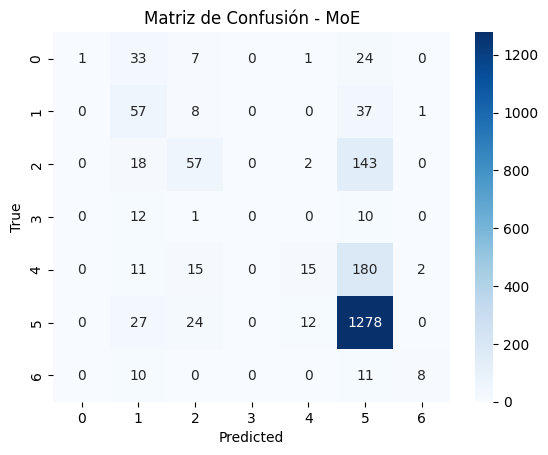

In [ ]:
# Instalar librerías necesarias
!pip install -q medmnist torchvision

# Importaciones
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import DataLoader
from medmnist.dataset import DermaMNIST
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Configurar dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Cargar y preparar dataset
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

train_dataset = DermaMNIST(split='train', transform=transform, download=True)
test_dataset = DermaMNIST(split='test', transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Definir una CNN simple
class ExpertCNN(nn.Module):
    def __init__(self):
        super(ExpertCNN, self).__init__()
        self.net = nn.Sequential(
            nn.Conv2d(3, 16, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(16, 32, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(32*16*16, 128), nn.ReLU(),
            nn.Linear(128, 7)  # 7 clases
        )

    def forward(self, x):
        return self.net(x)

# Gating Network
class GatingNetwork(nn.Module):
    def __init__(self):
        super(GatingNetwork, self).__init__()
        self.net = nn.Sequential(
            nn.Conv2d(3, 8, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(8*32*32, 64), nn.ReLU(),
            nn.Linear(64, 3),  # 3 expertos
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        return self.net(x)

#Función de entrenamiento de MoE
def train_moe(experts, gate, loader, criterion, optimizers, gate_opt, epochs=5):
    for epoch in range(epochs):
        for images, labels in loader:
            images, labels = images.to(device), labels.squeeze().to(device)

            outputs = [expert(images) for expert in experts]
            gate_weights = gate(images)

            # Mezclar predicciones con pesos de la compuerta
            combined = torch.zeros_like(outputs[0])
            for i in range(len(experts)):
                combined += gate_weights[:, i].unsqueeze(1) * outputs[i]

            loss = criterion(combined, labels)

            for opt in optimizers:
                opt.zero_grad()
            gate_opt.zero_grad()
            loss.backward()
            for opt in optimizers:
                opt.step()
            gate_opt.step()

        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# Función de evaluación
def evaluate_moe(experts, gate, loader):
    all_preds, all_labels = [], []
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.squeeze().to(device)
            outputs = [expert(images) for expert in experts]
            gate_weights = gate(images)
            combined = torch.zeros_like(outputs[0])
            for i in range(len(experts)):
                combined += gate_weights[:, i].unsqueeze(1) * outputs[i]
            preds = combined.argmax(dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    print("\nReporte clasificación MoE:\n")
    print(classification_report(all_labels, all_preds))

    cm = confusion_matrix(all_labels, all_preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title("Matriz de Confusión - MoE")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# Inicializar modelos
expert1 = ExpertCNN().to(device)
expert2 = ExpertCNN().to(device)
expert3 = ExpertCNN().to(device)
gate = GatingNetwork().to(device)

experts = [expert1, expert2, expert3]
criterio = nn.CrossEntropyLoss()
optimizadores = [optim.Adam(expert.parameters(), lr=0.001) for expert in experts]
gate_opt = optim.Adam(gate.parameters(), lr=0.001)

# Entrenar MoE
train_moe(experts, gate, train_loader, criterio, optimizadores, gate_opt, epochs=5)

# Evaluar MoE
evaluate_moe(experts, gate, test_loader)
